<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Project-2/Climate-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
url = 'https://raw.githubusercontent.com/james-monahan/Code-school-notebooks/main/Project-2/all_data.csv'
df = pd.read_csv(url, index_col=0)
cols = list(df.columns)

#EDA

In [4]:
df.tail()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
2016,3151070.794,1361.3384,-0.130798,325.0,0.077099,8.059615,1.208,14246.77631,7.464022e+09,0.524395,-0.183,0.078,5.0,0.0,0.000000
2017,3151070.794,1361.2147,-0.824543,276.0,0.078719,8.057924,1.098,NaN,7.547859e+09,0.407761,-0.170,0.079,8.0,4.0,0.500000
2018,NaN,1361.2560,-1.846386,282.0,0.082473,8.056726,1.024,NaN,7.631091e+09,0.358287,NaN,NaN,14.0,16.0,1.142857
2019,NaN,NaN,-2.279575,361.0,0.088309,NaN,1.160,NaN,7.713468e+09,0.461826,NaN,NaN,7.0,14.0,2.000000
2020,NaN,NaN,-1.968411,NaN,NaN,NaN,1.230,NaN,7.794799e+09,0.515080,NaN,NaN,2.0,0.0,0.000000


In [5]:
df_drop_na = df.dropna(thresh=9)
df_drop_na.head()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
1900,NaN,1360.7290,NaN,5.0,NaN,NaN,0.150,487.303701,1.645092e+09,NaN,-0.05,0.01,4.0,6.0,1.500
1901,NaN,1360.6394,NaN,2.0,NaN,NaN,0.080,498.787761,1.658157e+09,NaN,-0.03,0.01,2.0,3.0,1.500
1902,NaN,1360.6319,NaN,9.0,NaN,NaN,-0.050,512.861382,1.671889e+09,NaN,-0.50,0.01,8.0,23.0,2.875
1903,NaN,1360.7228,NaN,8.0,NaN,NaN,-0.144,559.129905,1.686283e+09,NaN,-1.80,0.01,2.0,1.0,0.500
1904,NaN,1361.0143,NaN,2.0,NaN,NaN,-0.208,565.849518,1.700862e+09,NaN,-0.80,0.02,1.0,2.0,2.000


In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_drop_na)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
scaled_df.index = df_drop_na.index
scaled_df.tail()

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
2015,-0.056734,1.188026,-1.363805,1.911296,1.266496,-1.393813,2.244184,2.212340,1.889534,1.617840,0.244318,1.546863,0.738684,-1.126702,-1.636032
2016,-1.386546,0.217672,-0.100543,1.507560,1.413182,-1.552725,2.521276,2.190807,1.934277,2.596754,0.272670,1.595257,0.329117,-1.524780,-1.974607
2017,-1.386546,-0.112723,-0.825534,1.147869,1.475709,-1.659149,2.197019,NaN,1.978815,1.937570,0.301021,1.643651,1.557819,-0.728624,-1.466745
2018,NaN,-0.002413,-1.893400,1.191913,1.620574,-1.734545,1.978882,NaN,2.023031,1.657956,NaN,NaN,4.015222,1.659842,-0.813779
2019,NaN,NaN,-2.346099,1.771824,1.845802,NaN,2.379782,NaN,2.066793,2.243130,NaN,NaN,1.148251,1.261764,0.056843


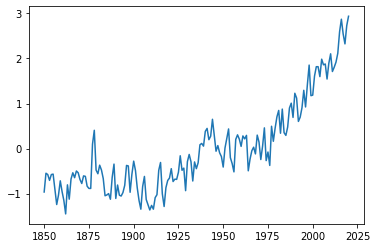

In [11]:
scaler2 = StandardScaler()
temp_no_na = df[['mean_global_temp']].dropna()
scaled_temp = scaler2.fit_transform(temp_no_na)
scaled_temp = pd.DataFrame(scaled_temp)
scaled_temp.index = list(range(1850,2021))

plt.plot(scaled_temp)
# plt.plot(df['mean_global_temp'])
plt.show()

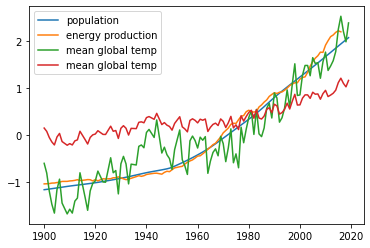

In [15]:
plt.plot(scaled_df['population'], label='population')
plt.plot(scaled_df['energy_production-mtoe'], label='energy production')
plt.plot(scaled_df['mean_global_temp'], label='mean global temp')
plt.plot(df_drop_na['mean_global_temp'], label='mean global temp')

plt.legend()
plt.show()

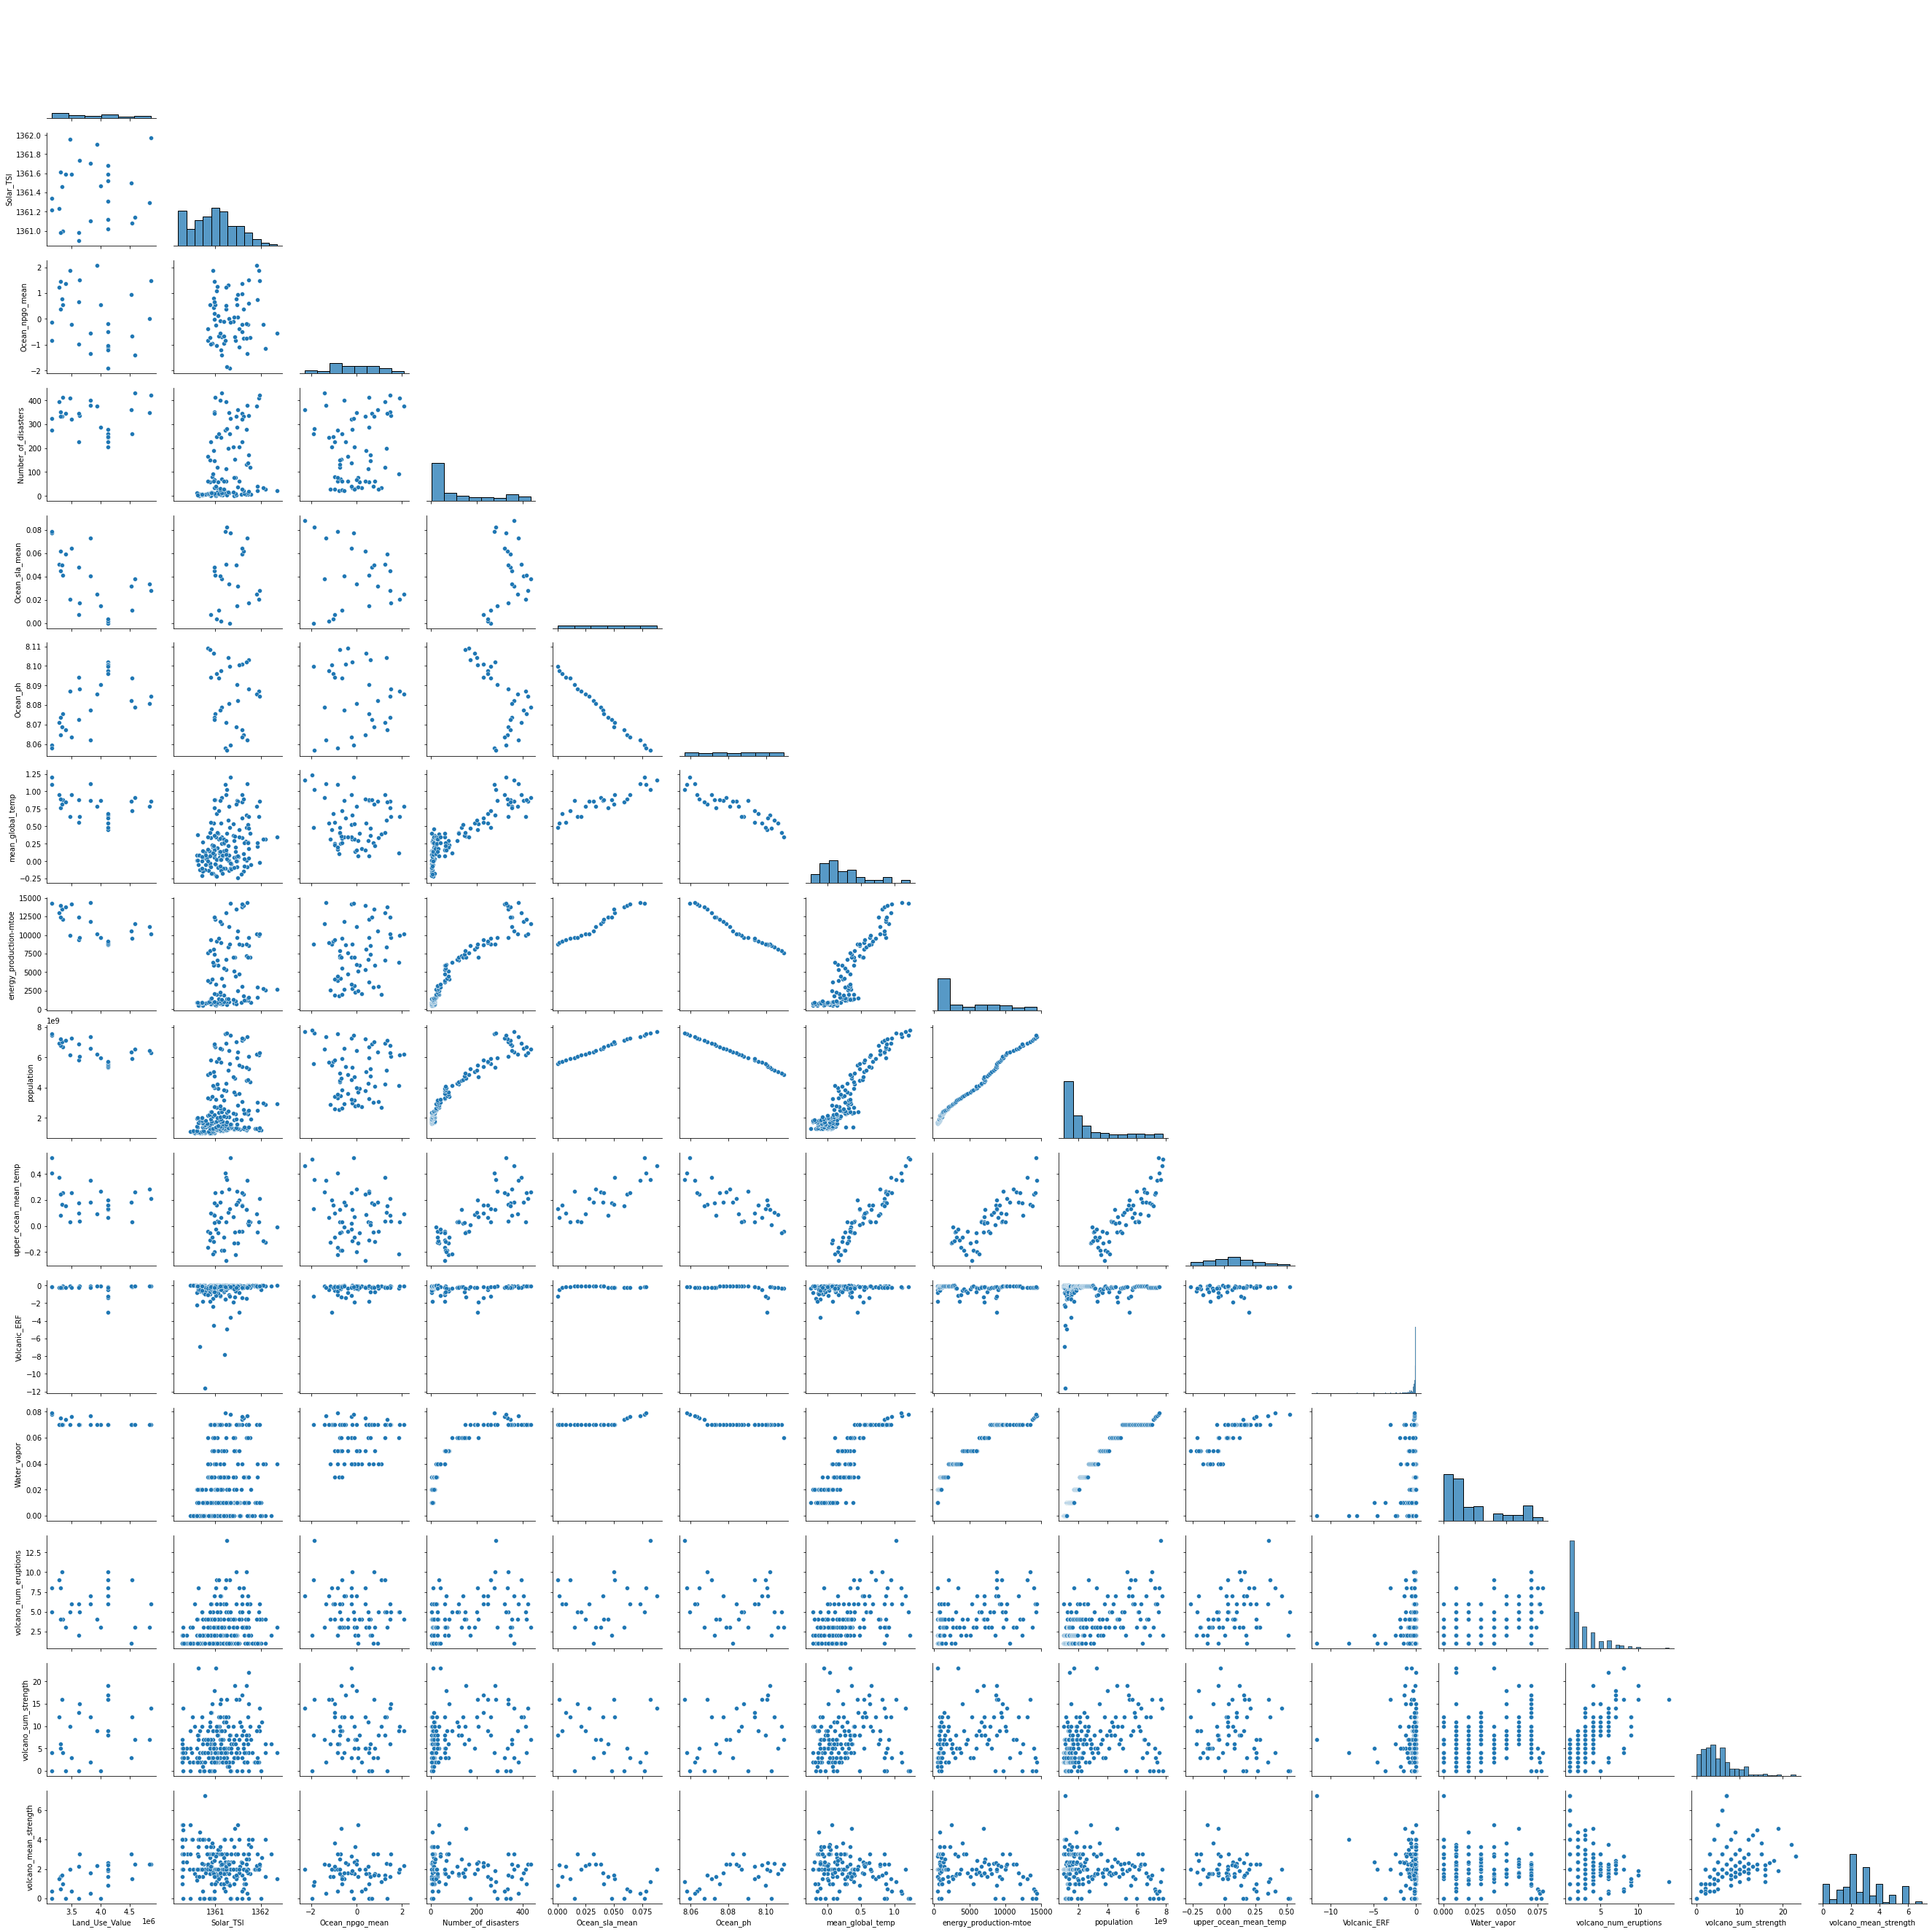

In [16]:
sns.pairplot(df, corner=True)

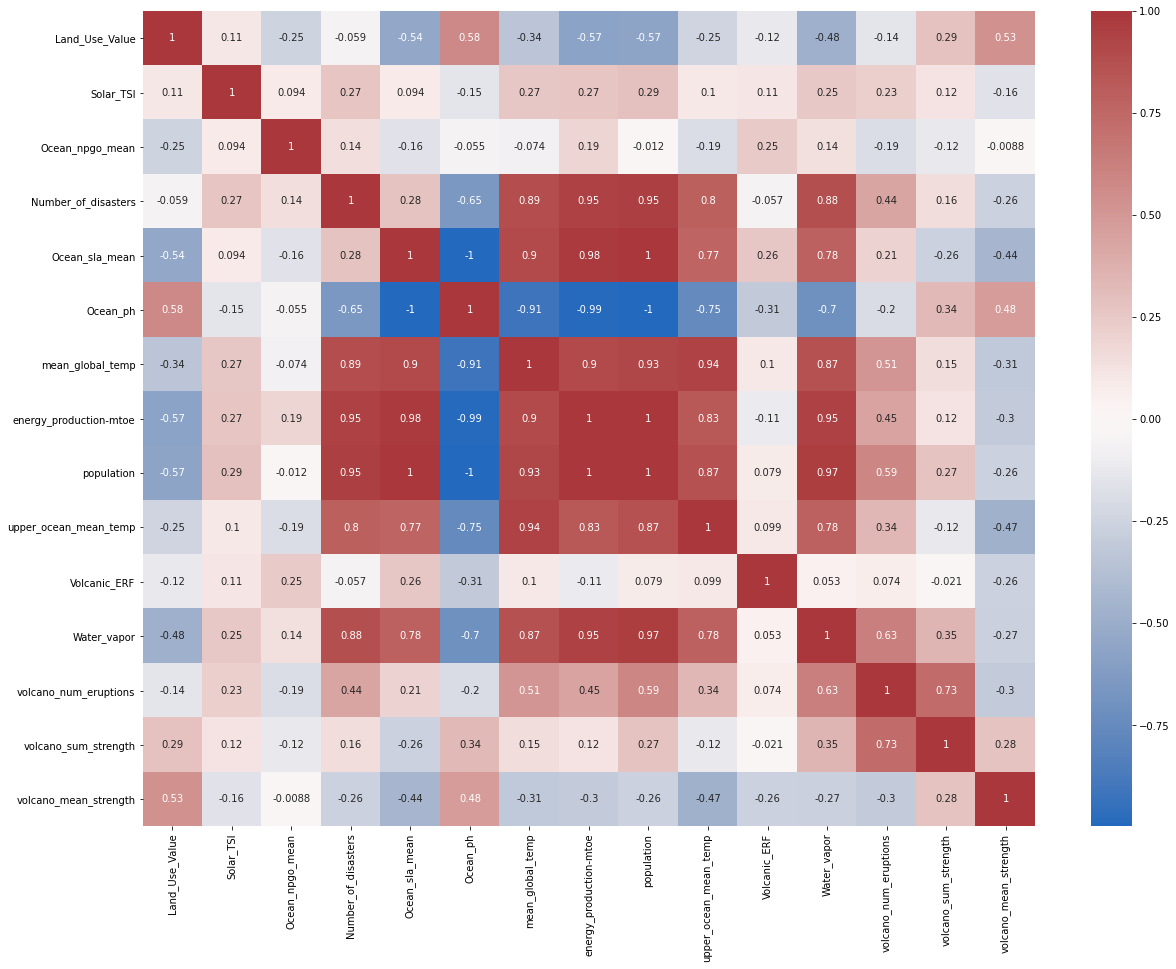

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap = "vlag")

2.151364942528736
2.1012416794674857
1.5716567460317463


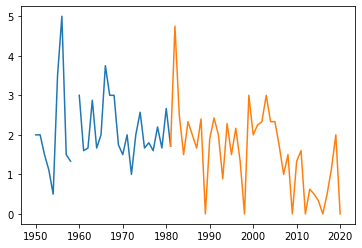

In [18]:
#The period of 1951-1980 was chosen largely because the U.S. National Weather Service uses a three-decade period to define “normal” or average temperature
#comparing volcanic activity of that perior to present
plt.plot(df['volcano_mean_strength'].loc[1950:1981])
plt.plot(df['volcano_mean_strength'].loc[1981:])
print(df['volcano_mean_strength'].loc[1800:1951].mean())
print(df['volcano_mean_strength'].loc[1950:1981].mean())
print(df['volcano_mean_strength'].loc[1981:].mean())

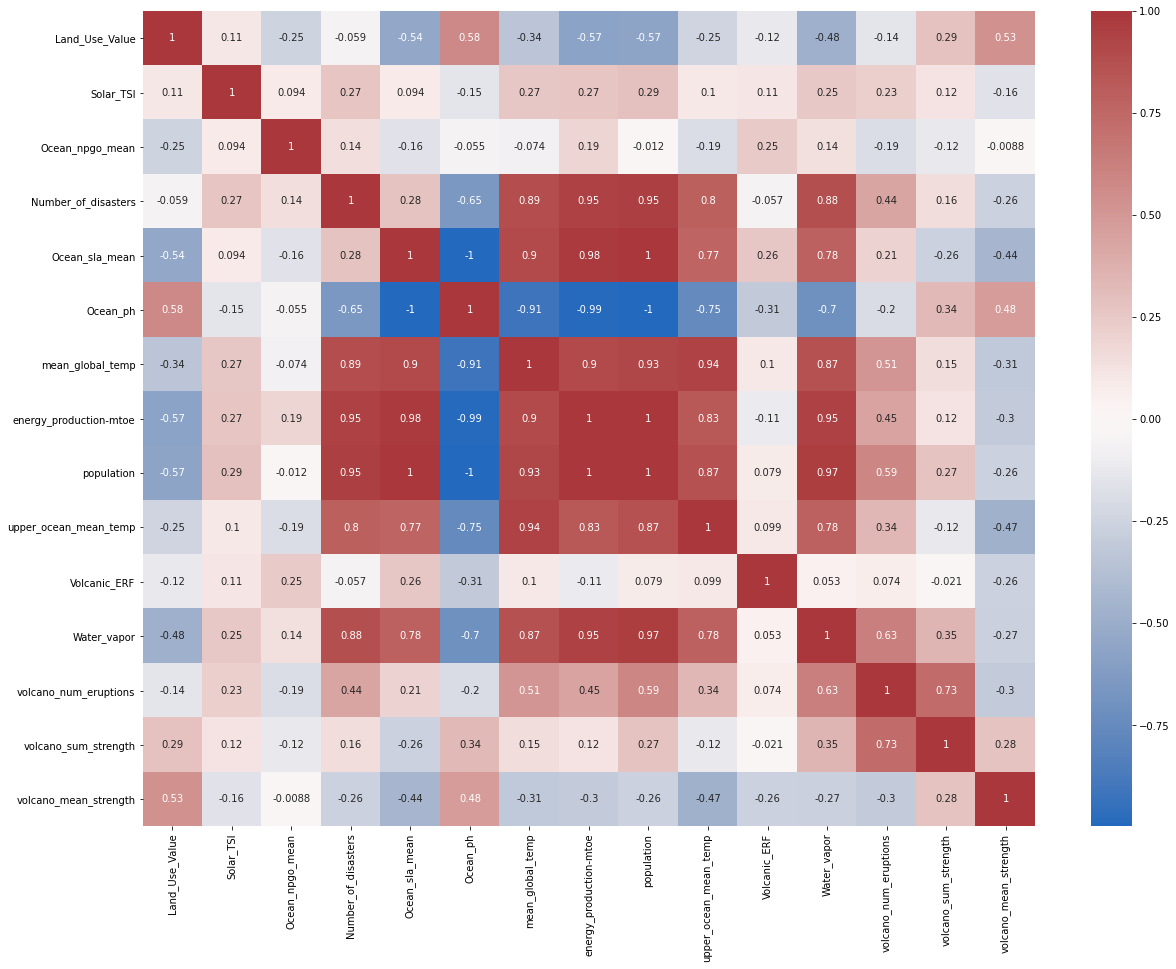

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap = "vlag")

In [20]:
#correlations - alternative presentation format
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Land_Use_Value,Solar_TSI,Ocean_npgo_mean,Number_of_disasters,Ocean_sla_mean,Ocean_ph,mean_global_temp,energy_production-mtoe,population,upper_ocean_mean_temp,Volcanic_ERF,Water_vapor,volcano_num_eruptions,volcano_sum_strength,volcano_mean_strength
Land_Use_Value,1.00,0.11,-0.25,-0.06,-0.54,0.58,-0.34,-0.57,-0.57,-0.25,-0.12,-0.48,-0.14,0.29,0.53
Solar_TSI,0.11,1.00,0.09,0.27,0.09,-0.15,0.27,0.27,0.29,0.10,0.11,0.25,0.23,0.12,-0.16
Ocean_npgo_mean,-0.25,0.09,1.00,0.14,-0.16,-0.05,-0.07,0.19,-0.01,-0.19,0.25,0.14,-0.19,-0.12,-0.01
Number_of_disasters,-0.06,0.27,0.14,1.00,0.28,-0.65,0.89,0.95,0.95,0.80,-0.06,0.88,0.44,0.16,-0.26
Ocean_sla_mean,-0.54,0.09,-0.16,0.28,1.00,-1.00,0.90,0.98,1.00,0.77,0.26,0.78,0.21,-0.26,-0.44
Ocean_ph,0.58,-0.15,-0.05,-0.65,-1.00,1.00,-0.91,-0.99,-1.00,-0.75,-0.31,-0.70,-0.20,0.34,0.48
mean_global_temp,-0.34,0.27,-0.07,0.89,0.90,-0.91,1.00,0.90,0.93,0.94,0.10,0.87,0.51,0.15,-0.31
energy_production-mtoe,-0.57,0.27,0.19,0.95,0.98,-0.99,0.90,1.00,1.00,0.83,-0.11,0.95,0.45,0.12,-0.30
population,-0.57,0.29,-0.01,0.95,1.00,-1.00,0.93,1.00,1.00,0.87,0.08,0.97,0.59,0.27,-0.26
upper_ocean_mean_temp,-0.25,0.10,-0.19,0.80,0.77,-0.75,0.94,0.83,0.87,1.00,0.10,0.78,0.34,-0.12,-0.47


In [21]:
df_sun_ocean = df[['Solar_TSI', 'Ocean_ph']]
df_sun_ocean = df_sun_ocean.dropna()
df_sun_ocean.head()

,Solar_TSI,Ocean_ph
1985,1360.8359,8.109290
1986,1360.8877,8.108254
1987,1360.9677,8.106547
1988,1361.2840,8.104264
1989,1361.7357,8.103006


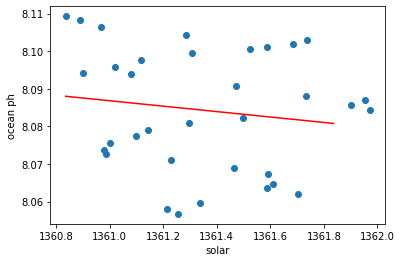

In [26]:
## polyfit on solar activity and ocean ph
X_axis = df_sun_ocean['Solar_TSI']
Y_axis = df_sun_ocean['Ocean_ph']

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 1) 

X_min = X_axis.min()
X_max = X_axis.max()
array_ = np.arange(X_min, X_max)
np.poly1d(polymodel)(array_)
poly_vals = np.poly1d(polymodel)(array_)

plt.scatter(X_axis, Y_axis)
plt.plot(array_, poly_vals, c='r'  )
plt.xlabel('solar')
plt.ylabel('ocean ph')

plt.show()

In [27]:
# 3-d visualization including time
fig = px.scatter_3d(df, 'Solar_TSI', 'Ocean_ph', df.index)
fig.show()

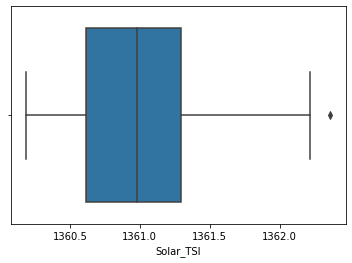

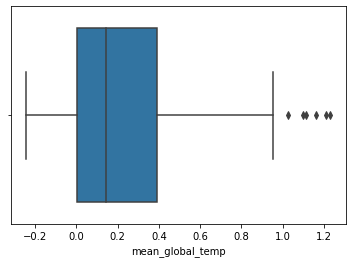

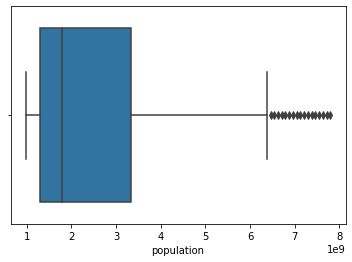

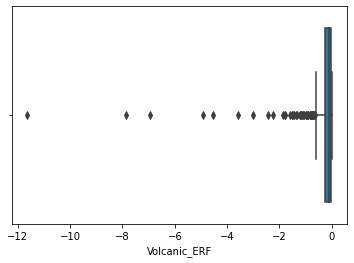

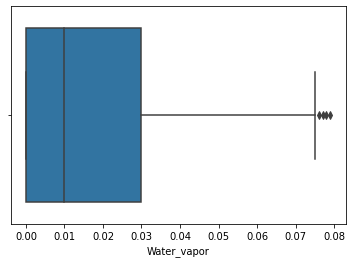

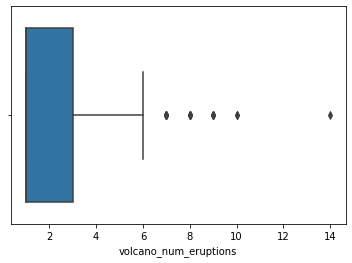

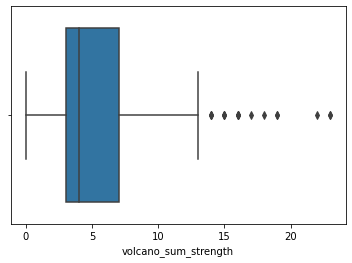

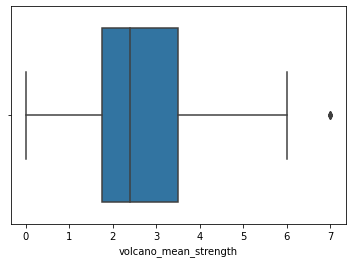

In [28]:
#Search for any outlier activity that is not following the trend
outliers_ = ['Solar_TSI', 'mean_global_temp','population',
            'Volcanic_ERF', 'Water_vapor', 'volcano_num_eruptions',
            'volcano_sum_strength', 'volcano_mean_strength']
for val in outliers_:
  sns.boxplot(x=val, data=df)
  plt.show()

In [29]:
def outliers(data):
  """return list of elements that constitute outilers in the data"""
  outlier_elements = []
  IQR = np.percentile(data, 75) - np.percentile(data, 25)
  Low = np.percentile(data, 25) - (1.5*IQR)
  High = np.percentile(data, 75) + (1.5*IQR)
  for item in data:
    if item < Low or item > High:
      outlier_elements.append(item)
  return outlier_elements

In [30]:
for val in outliers_: 
  o_data = df[val].dropna()
  outs = outliers(o_data)
  print(val)
  print(df.loc[df[val].isin(outs), val].tail())

Solar_TSI
1958    1362.3628
Name: Solar_TSI, dtype: float64
mean_global_temp
2016    1.208
2017    1.098
2018    1.024
2019    1.160
2020    1.230
Name: mean_global_temp, dtype: float64
population
2016    7.464022e+09
2017    7.547859e+09
2018    7.631091e+09
2019    7.713468e+09
2020    7.794799e+09
Name: population, dtype: float64
Volcanic_ERF
1983   -1.88
1984   -0.75
1991   -1.35
1992   -3.03
1993   -1.23
Name: Volcanic_ERF, dtype: float64
Water_vapor
2014    0.076
2015    0.077
2016    0.078
2017    0.079
Name: Water_vapor, dtype: float64
volcano_num_eruptions
2011    10.0
2013     8.0
2017     8.0
2018    14.0
2019     7.0
Name: volcano_num_eruptions, dtype: float64
volcano_sum_strength
1999    15.0
2002    14.0
2011    16.0
2018    16.0
2019    14.0
Name: volcano_sum_strength, dtype: float64
volcano_mean_strength
-4350    7.0
-1610    7.0
 1000    7.0
 1815    7.0
Name: volcano_mean_strength, dtype: float64
